<a href="https://colab.research.google.com/github/isheekajain/Covid-19_Vaccines_Analysis/blob/main/Covid_19_Vaccines_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Context


### Introduction

Many vaccines have been introduced so far to fight covid-19. No vaccine has guaranteed 100% accuracy so far, but most manufacturing companies claim their vaccine is not 100% accurate, but still, it will save your life by giving you immunity.

Thus, each country tries to vaccinate a large part of its population so as not to depend on a single vaccine. That’s what I’m going to analyze in this project, which is how many vaccines each country is using to fight covid-19.


The dataset that I will be using here is taken from Kaggle https://www.kaggle.com/gpreda/covid-world-vaccination-progress

### Import Statements

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline


### Read the Data

In [ ]:
df_data = pd.read_csv('country_vaccinations.csv')

# Data Exploration & Cleaning

In [ ]:
df_data.shape

(66330, 15)

In [ ]:
df_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://reliefweb.int/sites/reliefweb.int/file...


In [ ]:
df_data.tail()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
66325,Zimbabwe,ZWE,2021-12-22,7167610.0,4078945.0,3088665.0,15664.0,22030.0,47.49,27.03,20.47,1460.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66326,Zimbabwe,ZWE,2021-12-23,7188128.0,4089315.0,3098813.0,20518.0,18522.0,47.63,27.10,20.53,1227.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66327,Zimbabwe,ZWE,2021-12-24,7200776.0,4095685.0,3105091.0,12648.0,15484.0,47.71,27.14,20.57,1026.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66328,Zimbabwe,ZWE,2021-12-25,7209049.0,4100069.0,3108980.0,8273.0,13872.0,47.77,27.17,20.60,919.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...
66329,Zimbabwe,ZWE,2021-12-26,7214640.0,4103288.0,3111352.0,5591.0,12994.0,47.80,27.19,20.62,861.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...


### To find Duplicates

In [ ]:
print(f'Any duplicates? {df_data.duplicated().values.any()}')

Any duplicates? False


### To find NaN Values

In [ ]:
print(f'Any NaN values among the data? {df_data.isna().values.any()}')

Any NaN values among the data? True


In [ ]:
df_data.isna().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     31458
people_vaccinated                      32943
people_fully_vaccinated                35556
daily_vaccinations_raw                 37925
daily_vaccinations                       366
total_vaccinations_per_hundred         31458
people_vaccinated_per_hundred          32943
people_fully_vaccinated_per_hundred    35556
daily_vaccinations_per_million           366
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
#Fill NaNs with 0 and then drop all countries with iso_code = 0. This is key information that we need so dropping unknowns is the best way to handle. 
df_data.fillna(0, inplace = True)
df_data.drop(df_data.index[df_data['iso_code'] == 0], inplace = True)

In [ ]:
df_data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66330 entries, 0 to 66329
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              66330 non-null  object 
 1   iso_code                             66330 non-null  object 
 2   date                                 66330 non-null  object 
 3   total_vaccinations                   66330 non-null  float64
 4   people_vaccinated                    66330 non-null  float64
 5   people_fully_vaccinated              66330 non-null  float64
 6   daily_vaccinations_raw               66330 non-null  float64
 7   daily_vaccinations                   66330 non-null  float64
 8   total_vaccinations_per_hundred       66330 non-null  float64
 9   people_vaccinated_per_hundred        66330 non-null  float64
 10  people_fully_vaccinated_per_hundred  66330 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
df_data.vaccines.value_counts()

Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech     8152
Oxford/AstraZeneca                                                4992
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                      4940
Oxford/AstraZeneca, Pfizer/BioNTech                               3628
Moderna, Pfizer/BioNTech                                          2611
                                                                  ... 
Covaxin, Oxford/AstraZeneca                                        218
Johnson&Johnson, Oxford/AstraZeneca, Sinovac                       208
EpiVacCorona, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V     183
Johnson&Johnson, Moderna                                           155
Johnson&Johnson, Pfizer/BioNTech, Sinopharm/Beijing                121
Name: vaccines, Length: 77, dtype: int64

### Type Conversions

Coverting the `date` column to Pandas `Datetime` objects.

In [ ]:
df_data['date'] =  pd.to_datetime(df_data['date'], format='%Y-%m-%d')

#### Drop the columns

In [ ]:
#Print column names and drop the ones we don't intend to use. 
df_data.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [ ]:
df_data.drop(["people_fully_vaccinated",
              "daily_vaccinations_raw",
              "people_fully_vaccinated_per_hundred",
              "daily_vaccinations_per_million",
              "people_vaccinated_per_hundred", 
              "source_name",
              "source_website"],axis=1, inplace=True)

### Descriptive Statistics

In [ ]:
df_data.describe()

,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
count,6.633000e+04,6.633000e+04,6.633000e+04,66330.000000
mean,1.765329e+07,6.756061e+06,1.357120e+05,32.960844
std,1.265859e+08,3.803471e+07,8.186887e+05,51.429792
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,0.000000e+00,0.000000e+00,9.700000e+02,0.000000
50%,2.163500e+04,2.680000e+02,7.571500e+03,0.500000
75%,3.044387e+06,1.682419e+06,4.397625e+04,52.997500
max,2.769530e+09,1.225000e+09,2.242429e+07,321.000000


# Seaborn for Data 

### In India

In [ ]:
df_India = df_data[df_data["iso_code"] == 'IND'].copy()
df_India

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
27172,India,IND,2021-01-15,0.000000e+00,0.0,0.0,0.00,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27173,India,IND,2021-01-16,1.911810e+05,191181.0,191181.0,0.01,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27174,India,IND,2021-01-17,2.243010e+05,224301.0,112150.0,0.02,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27175,India,IND,2021-01-18,4.540490e+05,454049.0,151350.0,0.03,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27176,India,IND,2021-01-19,6.748350e+05,674835.0,168709.0,0.05,"Covaxin, Oxford/AstraZeneca, Sputnik V"
...,...,...,...,...,...,...,...,...
27513,India,IND,2021-12-22,1.391050e+09,831763875.0,5509274.0,99.83,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27514,India,IND,2021-12-23,1.398221e+09,833265701.0,5961434.0,100.35,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27515,India,IND,2021-12-24,1.404557e+09,834737784.0,5598521.0,100.80,"Covaxin, Oxford/AstraZeneca, Sputnik V"
27516,India,IND,2021-12-25,1.413982e+09,837078735.0,5846329.0,101.48,"Covaxin, Oxford/AstraZeneca, Sputnik V"


In [ ]:
df_India.drop(df_India.index[df_India['total_vaccinations'] == 0], inplace = True)

###Plot total vaccinations as a function of date

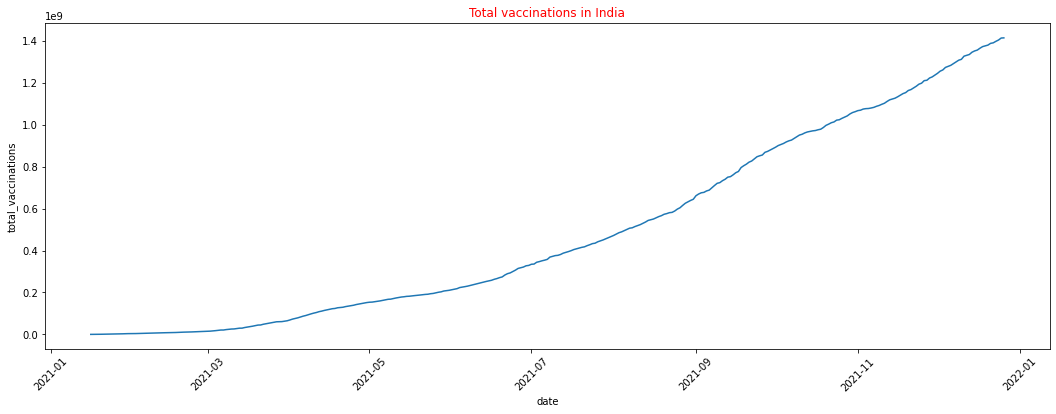

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(data=df_India, x="date", y="total_vaccinations")
plt.title("Total vaccinations in India", color="r")
plt.xticks(rotation=45)
plt.show()

###Plot daily vaccinations as a function of date

Text(0.5, 1.0, 'Daily vaccinations in India')

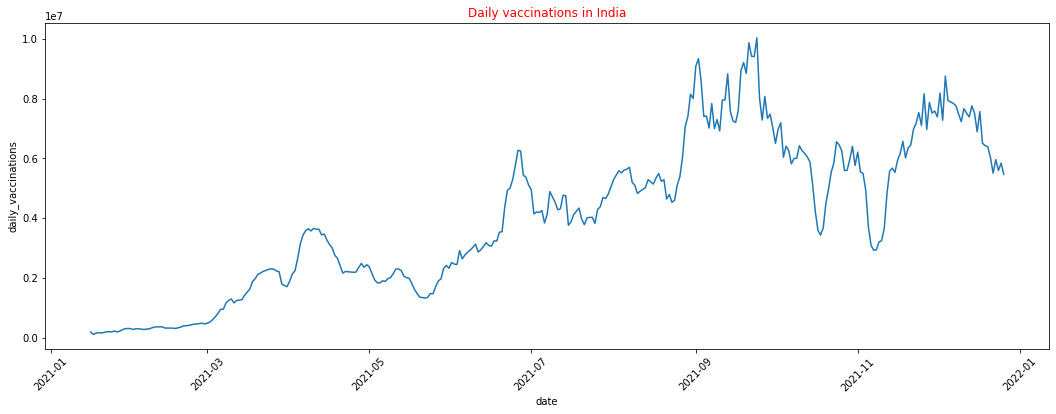

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_India, x="date", y="daily_vaccinations")
plt.xticks(rotation=45)
plt.title("Daily vaccinations in India", color="r")

### In Pakistan

In [ ]:
df_Pakistan = df_data[df_data["iso_code"] == 'PAK'].copy()
df_Pakistan

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
45403,Pakistan,PAK,2021-02-02,0.0,0.0,0.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45404,Pakistan,PAK,2021-02-03,0.0,0.0,3404.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45405,Pakistan,PAK,2021-02-04,0.0,0.0,3404.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45406,Pakistan,PAK,2021-02-05,0.0,0.0,3404.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45407,Pakistan,PAK,2021-02-06,0.0,0.0,3404.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
...,...,...,...,...,...,...,...,...
45724,Pakistan,PAK,2021-12-20,142713705.0,89091860.0,1127955.0,63.37,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45725,Pakistan,PAK,2021-12-21,144064235.0,89792114.0,1162968.0,63.97,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45726,Pakistan,PAK,2021-12-22,145453360.0,90529877.0,1190441.0,64.59,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
45727,Pakistan,PAK,2021-12-23,0.0,0.0,1213457.0,0.00,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."


In [ ]:
df_Pakistan.drop(df_Pakistan.index[df_Pakistan['total_vaccinations'] == 0], inplace = True)

###Plot total vaccinations as a function of date

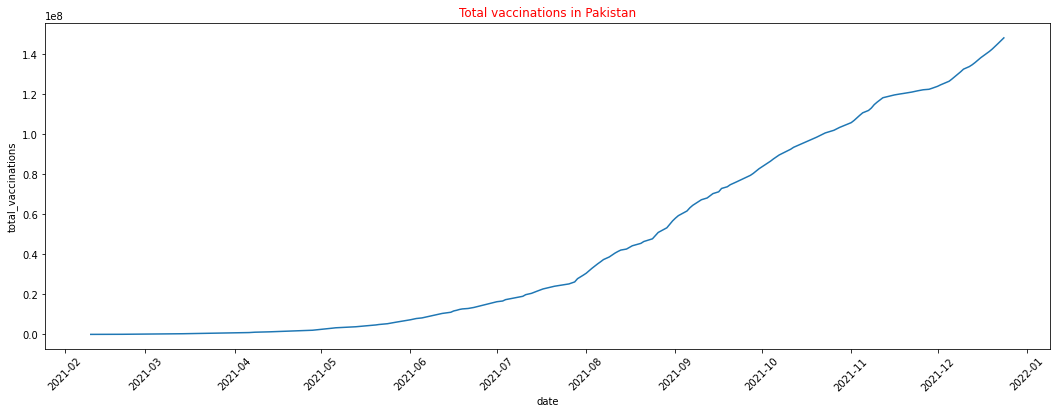

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_Pakistan, x="date", y="total_vaccinations")
plt.title("Total vaccinations in Pakistan", color="r")
plt.xticks(rotation=45)
plt.show()

###Plot daily vaccinations as a function of date

Text(0.5, 1.0, 'Daily vaccinations in Pakistan')

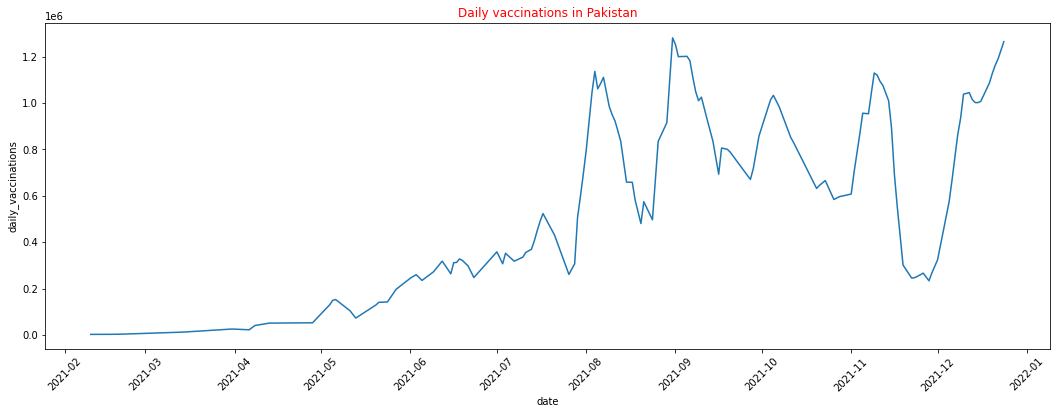

In [ ]:
plt.figure(figsize=(18, 6))
sns.lineplot(data=df_Pakistan, x="date", y="daily_vaccinations")
plt.xticks(rotation=45)
plt.title("Daily vaccinations in Pakistan", color="r")

In [ ]:
df = df_data[["vaccines", "country"]]
df.head()

,vaccines,country
0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
1,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
2,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan
4,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Afghanistan


## How many countries are taking each of the vaccines mentioned in this data?

In [ ]:
dict_ = {}
for i in df.vaccines.unique():
  dict_[i] = [df["country"][j] for j in df[df["vaccines"]==i].index]

vaccines = {}
for key, value in dict_.items():
  vaccines[key] = set(value)
for i, j in vaccines.items():
  print(f"{i}:>>{j}")

Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing:>>{'Afghanistan', 'Cameroon', 'Belize', 'Namibia', 'Trinidad and Tobago'}
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V:>>{'Azerbaijan', 'Bosnia and Herzegovina', 'Albania', 'Oman'}
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V:>>{'Zimbabwe', 'Algeria'}
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech:>>{'Australia', 'Finland', 'Isle of Man', 'Japan', 'United Kingdom', 'England', 'Andorra', 'Wales', 'Scotland', 'Sweden', 'Canada', 'Jersey', 'Sint Maarten (Dutch part)', 'Northern Ireland', 'Guernsey'}
Oxford/AstraZeneca:>>{'Pitcairn', 'Papua New Guinea', 'Angola', 'Mali', 'Montserrat', 'Togo', 'Nauru', 'Vanuatu', 'Tonga', 'Solomon Islands', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 'Tuvalu', 'Ethiopia', 'Kiribati', 'Nigeria', 'Democratic Republic of Congo', 'Falkland Islands', 'Saint Helena', 'Niue', 'Liberia', 'Fiji', 'Samoa'}
Oxford/AstraZeneca, Pfizer/BioNTech:>>{'Bermuda', 'C

## Top 10 countries with highest amount of vaccinated people per 100 of the population.

In [ ]:
#Group by total vaccinations given by country and sort descending to identify the top 10 countries. 
country_vac = df_data.groupby('country').max().sort_values('total_vaccinations', ascending=False)
country_vac = country_vac.iloc[:10]
country_vac

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,3503701.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


In [ ]:
#Now sort by total vaccinations per 100
country_vac = country_vac.sort_values('total_vaccinations_per_hundred', ascending=False)
country_vac

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,3503701.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,1675471.0,148.31,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi..."
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53,"Covaxin, Oxford/AstraZeneca, Sputnik V"
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."


## Plot a graph

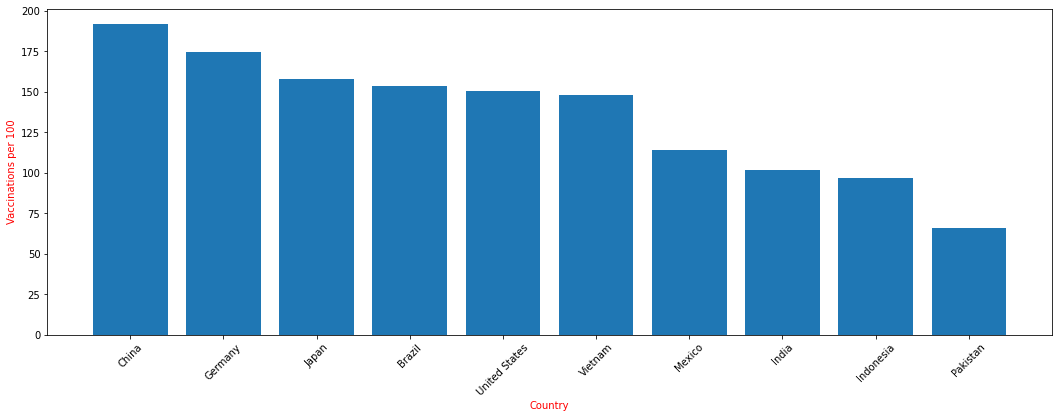

In [ ]:
plt.figure(figsize=(18, 6))
plt.bar(country_vac.index, country_vac.total_vaccinations_per_hundred)

plt.xticks(rotation = 45)
plt.ylabel('Vaccinations per 100', color="r")
plt.xlabel('Country', color="r")
plt.show()

# Country with most vaccinated people.

In [ ]:
#Group by total vaccinations given by country and sort descending to identify the top 10 countries. 
total_country_vac = df_data.groupby('country').max().sort_values('total_vaccinations', ascending=False)
total_country_vac = total_country_vac.iloc[:10]
total_country_vac

,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,vaccines
country,,,,,,,
China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S..."
India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53,"Covaxin, Oxford/AstraZeneca, Sputnik V"
United States,USA,2021-12-23,5.002223e+08,2.415206e+08,3503701.0,150.67,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ..."
Japan,JPN,2021-12-23,1.991201e+08,1.002624e+08,1997542.0,157.97,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech"
Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr..."
Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,..."
Germany,DEU,2021-12-25,1.466179e+08,6.140913e+07,1091256.0,174.75,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ..."


## Plot a graph

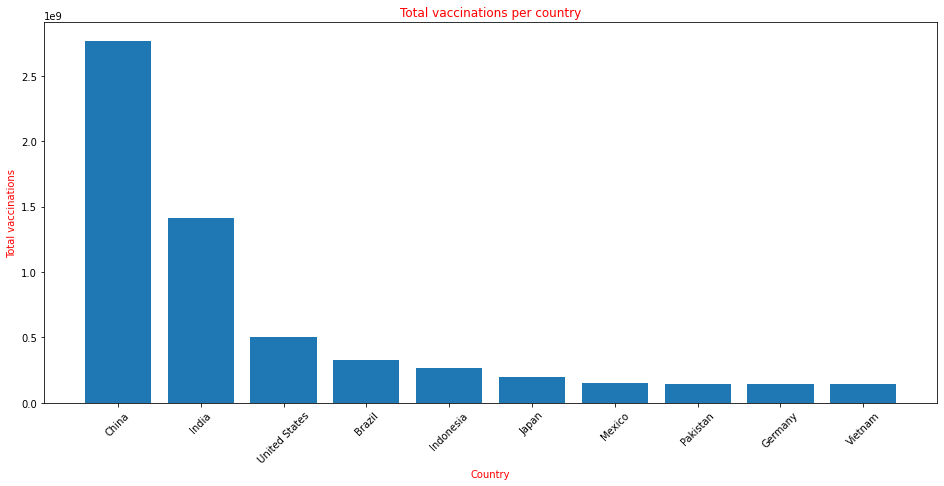

In [ ]:
plt.figure(figsize=(16, 7))
plt.bar(total_country_vac.index, total_country_vac.total_vaccinations)

plt.title('Total vaccinations per country', color="r")
plt.xticks(rotation=45)
plt.ylabel('Total vaccinations', color="r")
plt.xlabel('Country', color="r")
plt.show()

# Total vaccinations delivered by countries

In [ ]:
vac_names = df_data.groupby('vaccines').max().sort_values('total_vaccinations', ascending=False)
vac_names.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71


In [ ]:
#Get the top 10 vaccines by country for easy plotting
vac_names = vac_names.iloc[:10]
vac_names

,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
vaccines,,,,,,,
"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac, ZF2001",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71
"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,1997542.0,205.38
"CanSino, Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00
"CanSino, Covaxin, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac, Sputnik V",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84
"Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,1091256.0,208.04


In [ ]:
#Reset index to move vaccines from being index to a column.
vac_names=vac_names.reset_index()
vac_names

,vaccines,country,iso_code,date,total_vaccinations,people_vaccinated,daily_vaccinations,total_vaccinations_per_hundred
0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",China,CHN,2021-12-26,2.769530e+09,1.225000e+09,22424286.0,191.77
1,"Covaxin, Oxford/AstraZeneca, Sputnik V",India,IND,2021-12-26,1.414732e+09,8.372943e+08,10037995.0,101.53
2,"Johnson&Johnson, Moderna, Pfizer/BioNTech",United States,USA,2021-12-26,5.002223e+08,2.415206e+08,3503701.0,201.69
3,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Brazil,BRA,2021-12-23,3.284739e+08,1.658943e+08,1941268.0,153.50
4,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Indonesia,IDN,2021-12-26,2.672626e+08,1.566418e+08,1901294.0,96.71
5,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Wales,SXM,2021-12-26,1.991201e+08,1.002624e+08,1997542.0,205.38
6,"CanSino, Johnson&Johnson, Moderna, Oxford/Astr...",Mexico,MEX,2021-12-24,1.485049e+08,8.191465e+07,1648223.0,114.00
7,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",Pakistan,PAK,2021-12-24,1.482657e+08,9.208681e+07,1280906.0,65.84
8,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Spain,ROU,2021-12-26,1.466179e+08,6.140913e+07,1091256.0,208.04
9,"Abdala, Moderna, Oxford/AstraZeneca, Pfizer/Bi...",Vietnam,VNM,2021-12-25,1.455954e+08,7.707463e+07,1675471.0,148.31


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

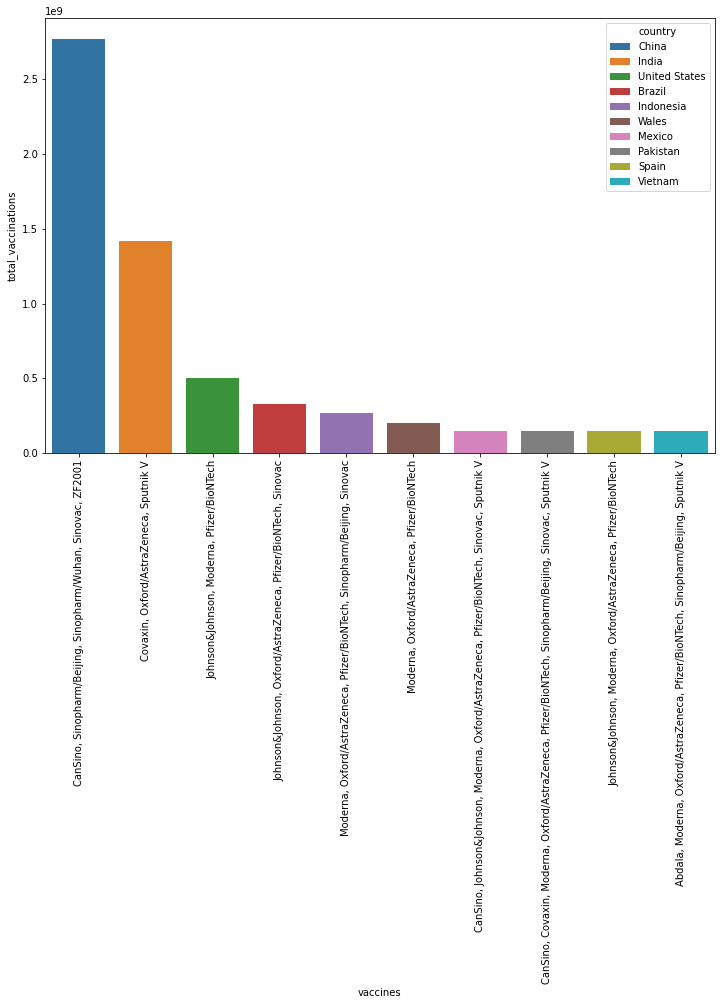

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(data = vac_names, x='vaccines', y = 'total_vaccinations', hue = 'country', dodge=False)
plt.xticks(rotation=90)

# Choropleth Map

In [ ]:
fig = px.choropleth(df_data.reset_index(), locations="iso_code",
                    color="total_vaccinations_per_hundred",
                    color_continuous_scale=px.colors.sequential.Electric,
                   title= "Total vaccinations per 100")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})  
fig.show()